In [74]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn

#To run this notebook, replace the string with the location of the Orders CSV on your computer
orders = pd.read_csv('/Users/heathercohen/Desktop/QuadPay/orders.csv')




In [75]:
#Figuring out the data
orders.dtypes

order_id                       object
customer_id                    object
merchant_id                    object
order_amount                  float64
checkout_started_at            object
credit_decision_started_at     object
approved_for_installments        bool
customer_credit_score           int64
customer_age                    int64
customer_billing_zip           object
customer_shipping_zip          object
paid_installment_1            float64
paid_installment_2              int64
paid_installment_3            float64
paid_installment_4            float64
dtype: object

In [ ]:
#Getting everything in a good format 

In [76]:
orders['paid_installment_2'] = orders['paid_installment_2'].astype('float64')
orders

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,95407,95407,1.0,1.0,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,85007,85007,1.0,1.0,1.0,1.0
2,381AFF,793FE0,2526E8,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,30305-2646,30305-2646,1.0,1.0,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,28562,28562,1.0,1.0,1.0,1.0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,92324,92324,1.0,1.0,1.0,1.0
5,8DB983,D0F607,6F498E,65.89,2018-08-30 06:12:00.100,2018-08-30 06:12:01.207,True,651,27,60463,98926,1.0,1.0,1.0,1.0
6,FF9F34,339F1A,B4645E,59.50,2018-09-28 22:32:45.957,2018-09-28 22:32:46.237,True,674,75,34234,34234,1.0,1.0,1.0,1.0
7,306E09,D0515B,6F498E,54.46,2018-09-27 23:49:18.743,2018-09-27 23:49:19.117,True,486,25,20110,20110,1.0,1.0,1.0,0.0
8,E23009,725557,8B9AB8,252.00,2018-09-16 18:13:45.823,2018-09-16 18:13:47.430,True,619,47,33065,33065,1.0,1.0,1.0,1.0
9,7810F9,304B2B,9C0B17,80.00,2018-09-29 21:22:29.333,2018-09-29 21:22:29.677,True,584,30,32824,32955,1.0,1.0,0.0,1.0


In [77]:
#Creating a defaulted or not binary variable

orders['default_status'] = np.where(((orders['paid_installment_2'] != 1) | (orders['paid_installment_3'] != 1) | (orders['paid_installment_4']!=1)) , 'defaulted', 'not defaulted')
orders.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,default_status
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,95407,95407,1.0,1.0,1.0,1.0,not defaulted
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,85007,85007,1.0,1.0,1.0,1.0,not defaulted
2,381AFF,793FE0,2526E8,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,30305-2646,30305-2646,1.0,1.0,1.0,1.0,not defaulted
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,28562,28562,1.0,1.0,1.0,1.0,not defaulted
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,92324,92324,1.0,1.0,1.0,1.0,not defaulted


In [78]:
orders.describe()

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
count,10000.000000,10000.000000,10000.000000,9998.0,10000.000000,9996.000000,9423.000000
mean,146.252272,613.435900,33.544300,1.0,0.977900,0.959684,0.940359
std,167.883106,92.555118,11.933729,0.0,0.147016,0.196709,0.236834
min,4.950000,1.000000,18.000000,1.0,0.000000,0.000000,0.000000
25%,64.000000,562.000000,24.000000,1.0,1.000000,1.000000,1.000000
50%,90.765000,611.000000,30.000000,1.0,1.000000,1.000000,1.000000
75%,155.000000,664.000000,40.250000,1.0,1.000000,1.000000,1.000000
max,1936.000000,836.000000,89.000000,1.0,1.000000,1.000000,1.000000


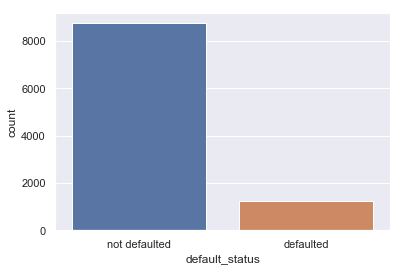

In [79]:
#Okay, let's see what our distribution is 

import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="default_status", data=orders)

In [80]:
x = len(orders[orders['default_status']=='defaulted'])/len(orders)
y = len(orders[orders['default_status']=='not defaulted'])/len(orders)

print("Defaulted orders are :", x*100, '%')
print("Non-defaulted orders are :", y*100, '%')

Defaulted orders are : 12.46 %
Non-defaulted orders are : 87.53999999999999 %


In [8]:
orders.groupby('default_status').mean()

,order_amount,approved_for_installments,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
default_status,,,,,,,,
defaulted,149.255562,True,583.910915,32.276083,1.0,0.822632,0.675523,0.15994
not defaulted,145.824799,True,617.638337,33.724812,1.0,1.000000,1.000000,1.00000


In [ ]:
#Are t - tests a good idea? Seems like maybe not with the distribution


In [9]:

from scipy.stats import ttest_ind


cat1 = orders[orders['default_status']=='defaulted']
cat2 = orders[orders['default_status']=='not defaulted']

print("Average credit score for defaulted loans:", np.mean(cat1['customer_credit_score']))
print("Average credit score for non-defaulted loans:", np.mean(cat2['customer_credit_score']))
print()
print(ttest_ind(cat1['customer_credit_score'], cat2['customer_credit_score']))
#Yay, a tiny p value 
print()
print("Credit score variance on defaulted loans:",np.var(cat1['customer_credit_score']))
print("Credit score variance on non-defaulted loans:",np.var(cat2['customer_credit_score']))
#Except given that the sample size and variance of the categories so differ, a t test is probably not a good tool here 




Average credit score for defaulted loans: 583.9109149277689
Average credit score for non-defaulted loans: 617.6383367603381

Ttest_indResult(statistic=-12.1224881553111, pvalue=1.3804929272612167e-33)

Credit score variance on defaulted loans: 7225.7970397728595
Credit score variance on non-defaulted loans: 8614.555742995572


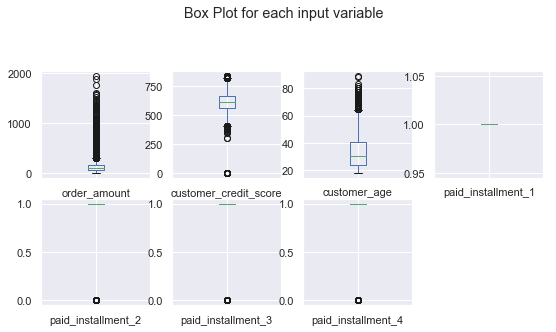

In [46]:
#Okay, let's check all the distributions 

orders.drop('default_status', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

#This ignores whether merchant ID or dates factor in 

/usr/local/lib/python3.6/site-packages/numpy/lib/histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


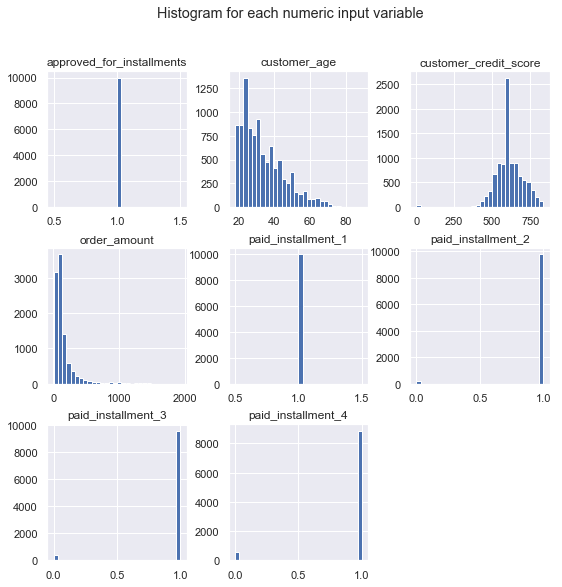

In [47]:
import pylab as pl
orders.drop('default_status' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('orders_hist')
plt.show()

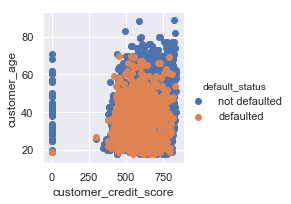

In [12]:
sns.FacetGrid(orders, 
    hue="default_status").map(plt.scatter, "customer_credit_score", "customer_age").add_legend()

plt.show()

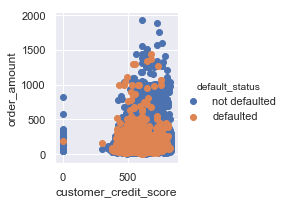

In [91]:
sns.FacetGrid(orders, 
    hue="default_status").map(plt.scatter, "customer_credit_score", "order_amount").add_legend()

plt.show()

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


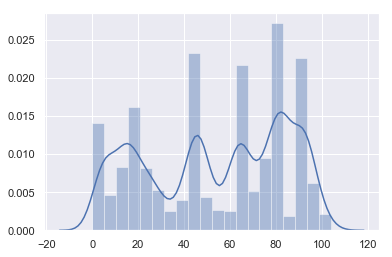

In [99]:
sns.distplot(orders["merchant_id"].astype('category').cat.codes)
#merchants are not evenly distributed

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


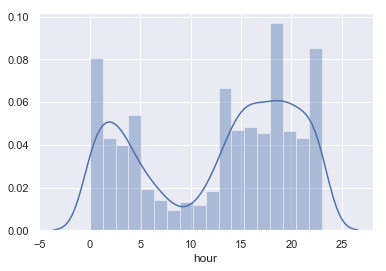

In [81]:
#Okay, but how does time play into the patterns?

#Transform the data

orders['checkout_started_at']= pd.to_datetime(orders['checkout_started_at'])
orders['checkout_started_at'][1].day


orders['day'] = pd.DatetimeIndex(orders['checkout_started_at']).day
orders['month'] = pd.DatetimeIndex(orders['checkout_started_at']).month
orders['year'] = pd.DatetimeIndex(orders['checkout_started_at']).year
orders['hour'] = pd.DatetimeIndex(orders['checkout_started_at']).hour

#orders.hour.describe()
orders.month.describe()
orders.month.unique() # only three months of data 
#orders.day.describe() 
#orders.year.describe() #Okay, good, only one year so we can safely ignore that variable

sns.distplot(orders.hour);


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


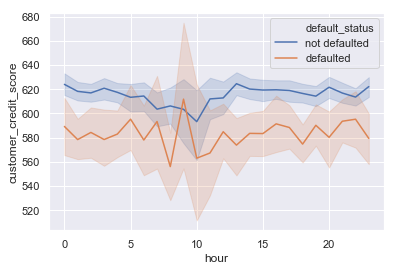

In [28]:
sns.lineplot(x='hour', y="customer_credit_score",
             hue="default_status",
             data=orders)

#The above histogram of hours shows a lull at 9am so, fewer loans make the variance less reliable 

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


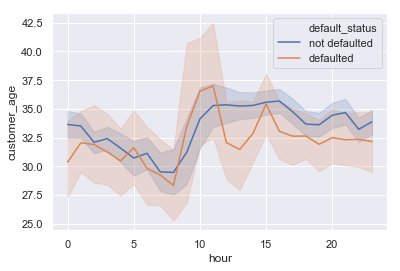

In [53]:
sns.lineplot(x='hour', y="customer_age",
             hue="default_status",
             data=orders)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


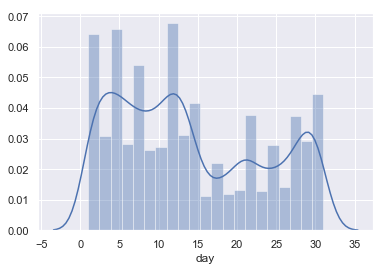

In [51]:
sns.distplot(orders.day);

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


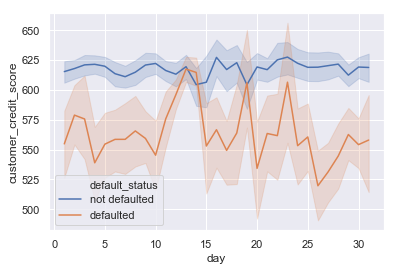

In [27]:
sns.lineplot(x='day', y="customer_credit_score",
             hue="default_status",
             data=orders)

#I wonder how well this maps up to average amount in bank accounts by day, re: when paydays and bills are due
#Maybe this pattern is partially explained by the payment hitting an empty bank account, which is more likely if
#rent was just due. 
#Given the histogram of days, it looks like more people apply on those days (13th, 18th, 22nd)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


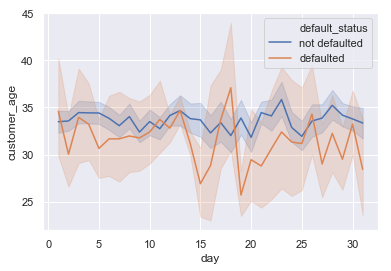

In [54]:
sns.lineplot(x='day', y="customer_age",
             hue="default_status",
             data=orders)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


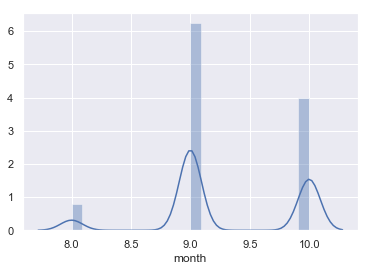

In [52]:
sns.distplot(orders.month);

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


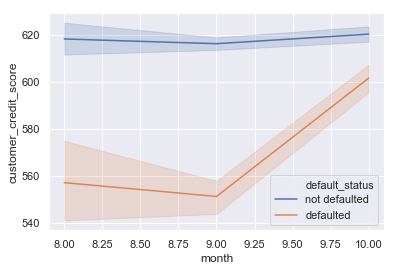

In [26]:
#Visualize all the potential patterns 

sns.lineplot(x='month', y="customer_credit_score",
             hue="default_status",
             data=orders)

#As the months go by, the average credit score of a person who defaults is increasing. That's not what I expected
#given the above month histogram, it might just be that many more loans were processing in Sep 

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


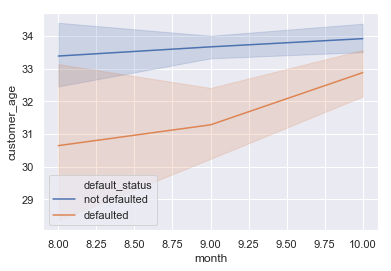

In [55]:
sns.lineplot(x='month', y="customer_age",
             hue="default_status",
             data=orders)

In [ ]:
#Timeseries Tl;DR, seems like most of the variance is just traffic flow and perhaps not inherently meaningful re: seasonality 

In [148]:
#Okay, let's build a little prediction model 

In [252]:
#Transform data 

orders.columns
subset= orders[['order_amount', 'customer_credit_score', 
        'customer_age']]
import string

#There were international aka non numeric values in these columns, with more time I would add another dimension and
#have two variables (international / national  as a binary categorical and American zipcode(numeric or NAN))


#subset['customer_billing_zip']= subset['customer_billing_zip'].str.replace(r'[^\w\s]+', '')
#subset['customer_shipping_zip']=subset['customer_shipping_zip'].str.replace(r'[^\w\s]+', '')
#, 'customer_billing_zip', 'customer_shipping_zip'

subset = subset.fillna(0)


In [274]:
#This is my inspecting the column to figure out why it was throwing an error


#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(subset['customer_shipping_zip'])

In [270]:

from sklearn.model_selection import train_test_split

X, y = subset, orders['default_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)



In [271]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, Y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [272]:
y_pred = svclassifier.predict(X_test)  


In [273]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[   0  281]
 [   1 1718]]
               precision    recall  f1-score   support

    defaulted       0.00      0.00      0.00       281
not defaulted       0.86      1.00      0.92      1719

    micro avg       0.86      0.86      0.86      2000
    macro avg       0.43      0.50      0.46      2000
 weighted avg       0.74      0.86      0.79      2000



In [ ]:
#.92 as an f1 score is actually pretty high to not even include zipcode. 

In [82]:
#Let's check correlations
#1 means defaulted, 0 means not defaulted
subset2 = orders
subset2['default_status'] = np.where(orders['default_status'] =="defaulted" , '1', '0')
subset2['default_status'] = subset2['default_status'].astype('int64')
subset2.dtypes
subset2.fillna(0)

                                    


,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,default_status,day,month,year,hour
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,95407,95407,1.0,1.0,1.0,1.0,0,3,10,2018,14
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,85007,85007,1.0,1.0,1.0,1.0,0,21,9,2018,16
2,381AFF,793FE0,2526E8,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,30305-2646,30305-2646,1.0,1.0,1.0,1.0,0,15,9,2018,13
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,28562,28562,1.0,1.0,1.0,1.0,0,10,10,2018,0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,92324,92324,1.0,1.0,1.0,1.0,0,12,9,2018,22
5,8DB983,D0F607,6F498E,65.89,2018-08-30 06:12:00.100,2018-08-30 06:12:01.207,True,651,27,60463,98926,1.0,1.0,1.0,1.0,0,30,8,2018,6
6,FF9F34,339F1A,B4645E,59.50,2018-09-28 22:32:45.957,2018-09-28 22:32:46.237,True,674,75,34234,34234,1.0,1.0,1.0,1.0,0,28,9,2018,22
7,306E09,D0515B,6F498E,54.46,2018-09-27 23:49:18.743,2018-09-27 23:49:19.117,True,486,25,20110,20110,1.0,1.0,1.0,0.0,1,27,9,2018,23
8,E23009,725557,8B9AB8,252.00,2018-09-16 18:13:45.823,2018-09-16 18:13:47.430,True,619,47,33065,33065,1.0,1.0,1.0,1.0,0,16,9,2018,18
9,7810F9,304B2B,9C0B17,80.00,2018-09-29 21:22:29.333,2018-09-29 21:22:29.677,True,584,30,32824,32955,1.0,1.0,0.0,1.0,1,29,9,2018,21


In [83]:
from scipy import stats
stats.pointbiserialr(orders['customer_age'], orders['default_status'])
#significant p value so customer age and default status are correlated sufficiently to consider as a feature

PointbiserialrResult(correlation=-0.040095415528027284, pvalue=6.055104051708949e-05)

In [84]:
stats.pointbiserialr(orders['customer_credit_score'], orders['default_status'])
#significant p value so customer credit score and default status are correlated sufficiently to consider as a feature

PointbiserialrResult(correlation=-0.1203557135386946, pvalue=1.3804929272628511e-33)

In [85]:
stats.pointbiserialr(orders['order_amount'], orders['default_status'])
#not a significant p value or correlation score so order amount doesn't seem to be a good feature to use

PointbiserialrResult(correlation=0.006749439547675003, pvalue=0.4997600979400989)

In [88]:
stats.pointbiserialr(orders['day'], orders['default_status'])
#not a significant p value or correlation score  so day of the week doesn't seem to be a good feature to use

PointbiserialrResult(correlation=-0.002555937069027256, pvalue=0.7982889299612619)

In [89]:
stats.pointbiserialr(orders['month'], orders['default_status'])
#significant p value and correlation score but artificially high because there are only three months of data. Still, probably worth considering as a featuer

PointbiserialrResult(correlation=0.19547206337675363, pvalue=1.0703494102945401e-86)

In [90]:
stats.pointbiserialr(orders['hour'], orders['default_status'])
#Significant p value so hour would be a good feature to include. With more time, I would control for time zone

PointbiserialrResult(correlation=0.028748285664583432, pvalue=0.00403946409874446)

In [98]:
stats.pointbiserialr((orders["merchant_id"].astype('category').cat.codes), orders['default_status'])
#Significant p value but artificially high because some merchants make up a large share 

PointbiserialrResult(correlation=-0.047564428463542634, pvalue=1.9499684514751567e-06)

In [ ]:
#Which features show strong correlation with a customer’s likelihood of paying back installments?
##Age, credit score, month, and potentially hour and merchant id. I would've also liked to do zipcode with more time and whether 
##having a different billing and shipping zipcode had any effect

#Which features should be discarded? Why?
##Order amount, day. They were not significantly different enough to indicate correlation 

#What surprised you about results/trends observed in the data?
##That the credit score of people defaulting on their loans keeps going up. It makes sense if you use a model that's
##increasingly only considering people with higher scores to begin with though! 

#What additional data would you like to see that might help build a better installment-approval classifier?
##Bank info like, average bank balance. If you have their routing number to take their money right out of their accounts
##instead of charging it to a card, I believe you can get some raw stats on their bank account. I'd also like sex (or gender)
## and ethnicity, even if only to prove there isn't hidden disproportate bias against a protected population
##In a perfect world, martial status, child/dependent numbers or status, or even 23andme data 

#What would be your next steps to train/build a model that we could use to make real time customer approval decisions?
##I would clean up zipcode to be uniform, create a (national/international) binary variable and then a USA zipcode variable 
##(either US zip or NAN) as well as state and city variables for both billing and shipping zipcode. I might also 
##include the US Census information about zipcode and add as a feature how generally wealthy their area is although that might
## be problematic if lazily used. I would also add in a local timezone/local time of purchase column and a "billing and shipping zip different" variable
##to see whether their inclusion helps the accuracy of the prediction model 
